<a href="https://colab.research.google.com/github/haseebshaik00/Optimizing-Health-Insights/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

# Set the seaborn style for visualizations
sns.set()

In [39]:
# Load the dataset
# Source: [Kaggle - https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos/data]
df1 = pd.read_csv("./calories.csv")
df1 = df1[[df1.columns[0], df1.columns[-1]]]

# Display the first five rows of the dataset for a quick overview
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [40]:
df1.shape

(15000, 2)

In [41]:
# Load the dataset
# Source: [Kaggle - https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos/data]
df2 = pd.read_csv("./exercise.csv")

# Display the first five rows to understand the structure of the data
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [42]:
df2.shape

(15000, 8)

In [43]:
# Load the dataset
df = pd.read_csv("./calories.csv")

# Display the first five rows of the dataset for a quick overview
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [45]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [46]:
df.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [47]:
# drop User_ID column because this is not required from Main Dataframe itself
df.drop(columns = ["User_ID"],axis=1,inplace =True)

In [48]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


Separate Categorical and Numerical Features
1. Categorical Feature

In [50]:
# Fetching columns with categorical (object type) data
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# Display the list of categorical columns
categorical_columns

['Gender']

In [51]:
# Get the count of unique values in the 'Gender' column
gender_counts = df["Gender"].value_counts()

# Display the value counts
gender_counts

,count
Gender,
female,7553
male,7447


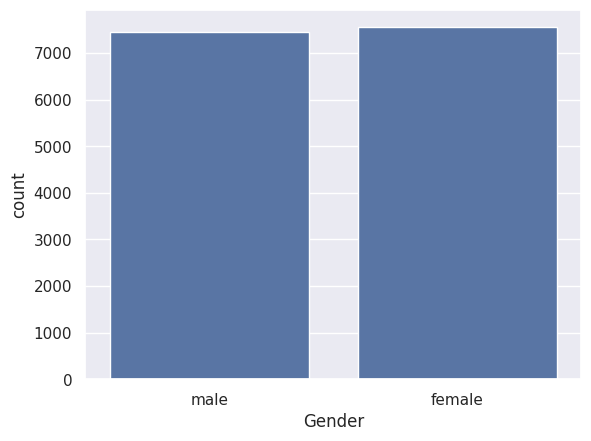

In [52]:
# Create the countplot for the 'Gender' column
sns.countplot(data=df, x='Gender')

# Display the plot
plt.show()

In [53]:
# Select only the categorical columns from the DataFrame
categorical_data = df[categorical_columns]

# Display the first few rows of the categorical data
categorical_data.head()

,Gender
0,male
1,female
2,male
3,female
4,female


In [54]:
# Convert the 'Gender' column in the categorical data to dummy variables, dropping the first category to avoid multicollinearity
categorical_data = pd.get_dummies(categorical_data["Gender"], drop_first=True)

# Display the resulting dummy variables
categorical_data.head()

,male
0,True
1,False
2,True
3,False
4,False


2.Numerical Features



In [55]:
# Fetching columns with numerical data (non-object types)
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']

# Display the list of numerical columns
numeric_columns


['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [56]:
# Get the shape of the DataFrame containing only the numerical columns
numeric_data_shape = df[numeric_columns].shape

# Display the shape of the numeric columns subset
numeric_data_shape


(15000, 7)

In [57]:
# Select only the numerical columns from the DataFrame
numerical_data = df[numeric_columns]

# Display the first few rows of the numerical data
numerical_data.head()


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [58]:
numerical_data.shape

(15000, 7)

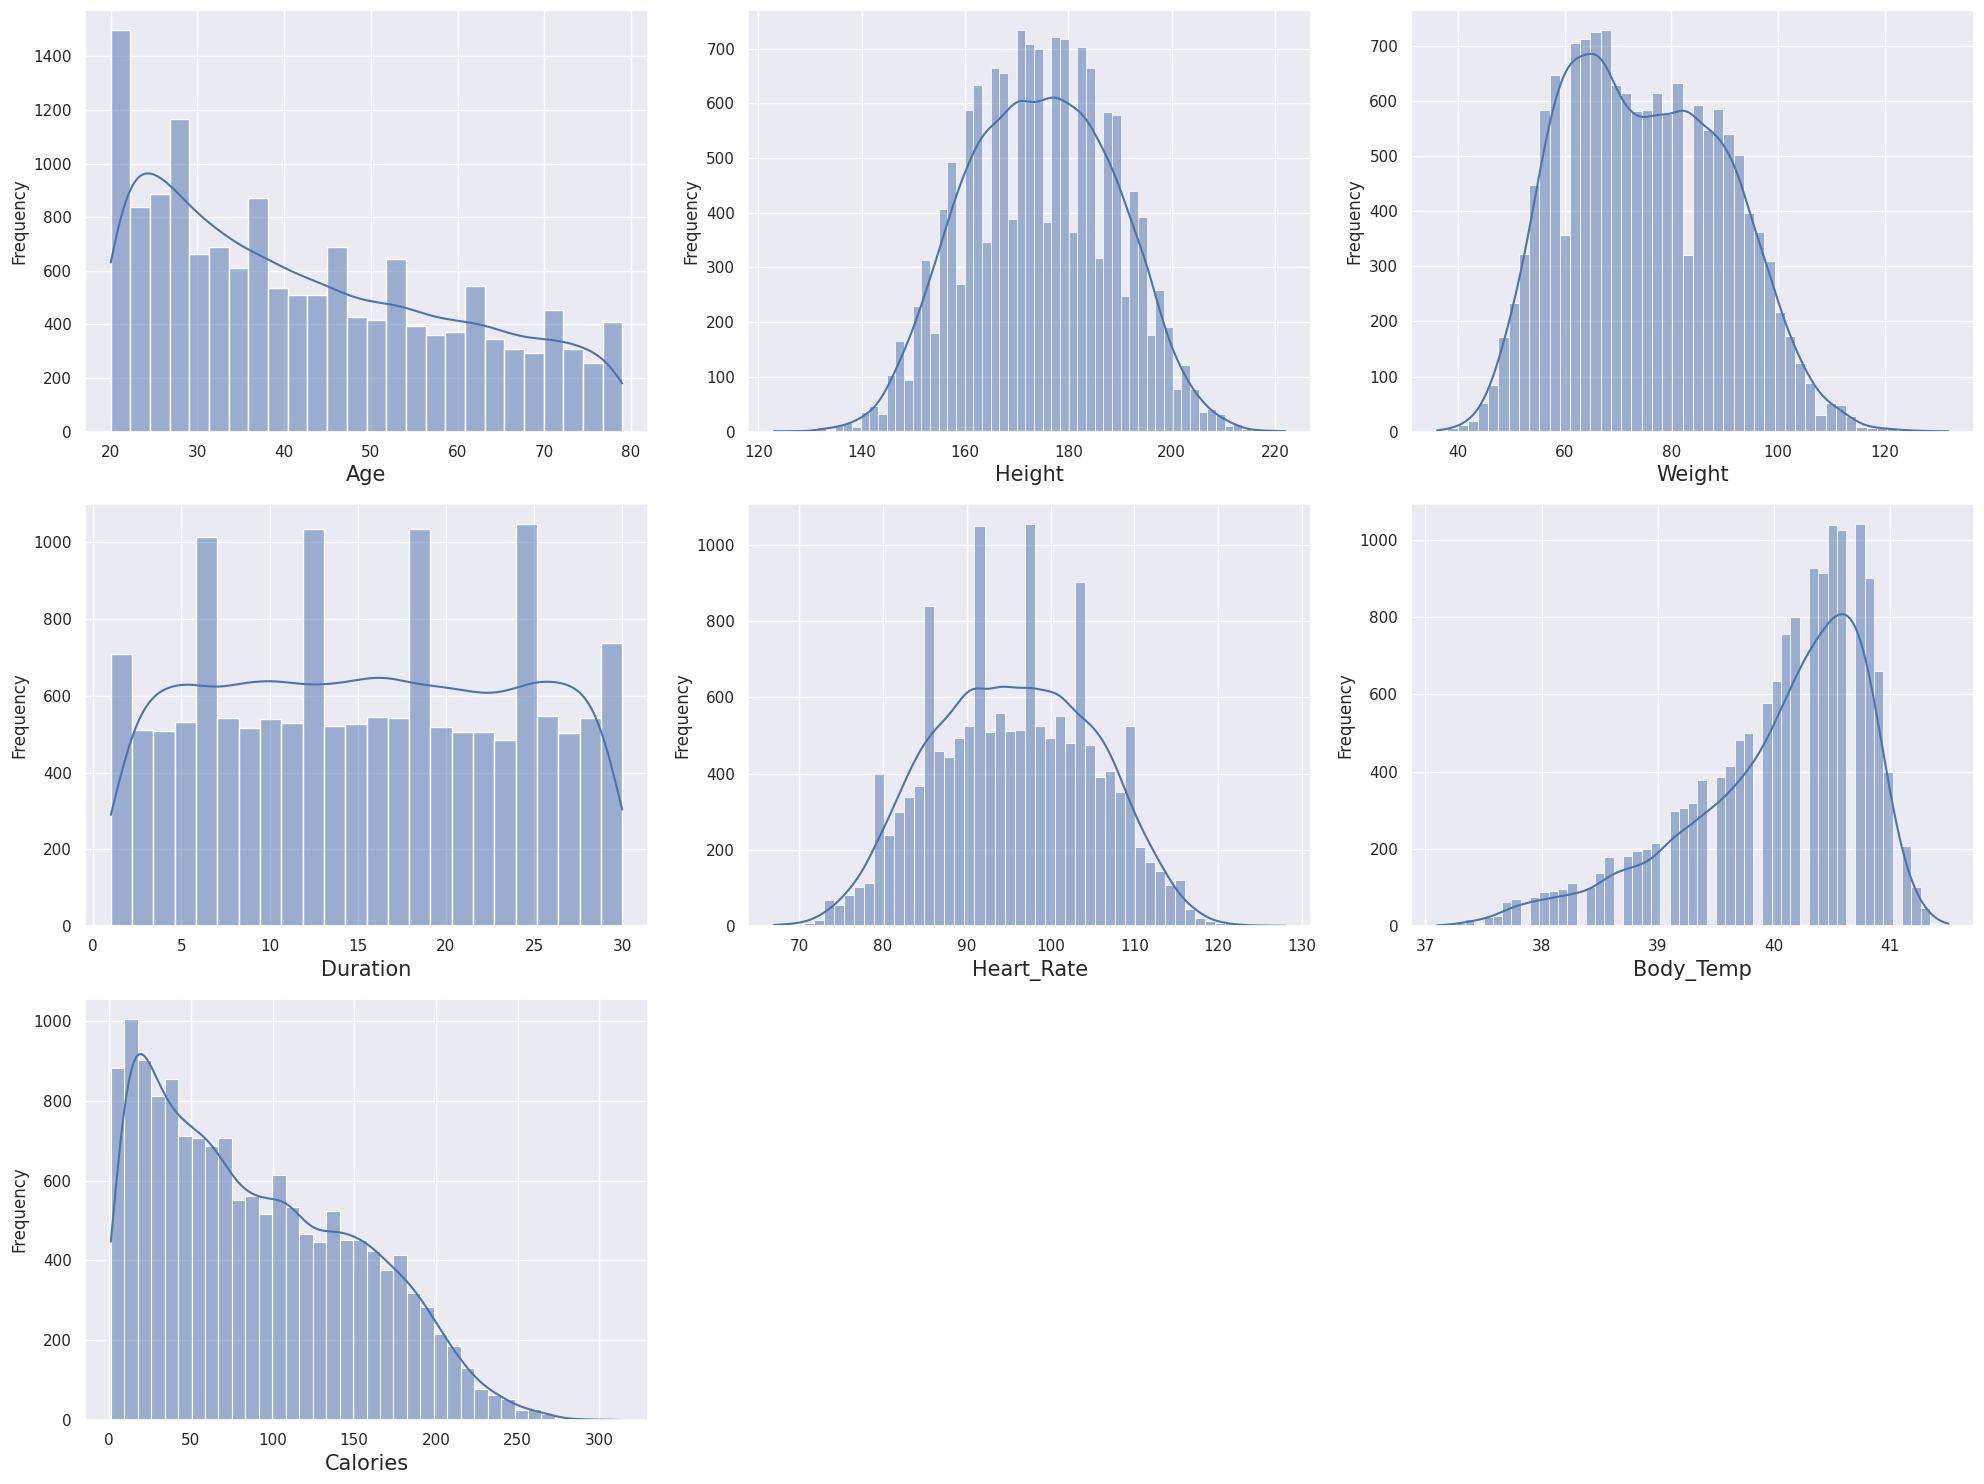

In [59]:
# Set up the plot figure size
plt.figure(figsize=(20, 15))

# Initialize the plot number
plot_number = 1

# Loop through each column in the numerical data and plot the distribution
for column in numerical_data:
    if plot_number <= 9:  # Adjusted the condition to limit to 9 subplots (3x3 grid)
        ax = plt.subplot(3, 3, plot_number)
        sns.histplot(numerical_data[column], kde=True)  # Updated to use 'histplot' for better compatibility
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Frequency', fontsize=12)
    plot_number += 1

# Display the plots
plt.tight_layout()  # Added for better spacing between subplots
plt.show()


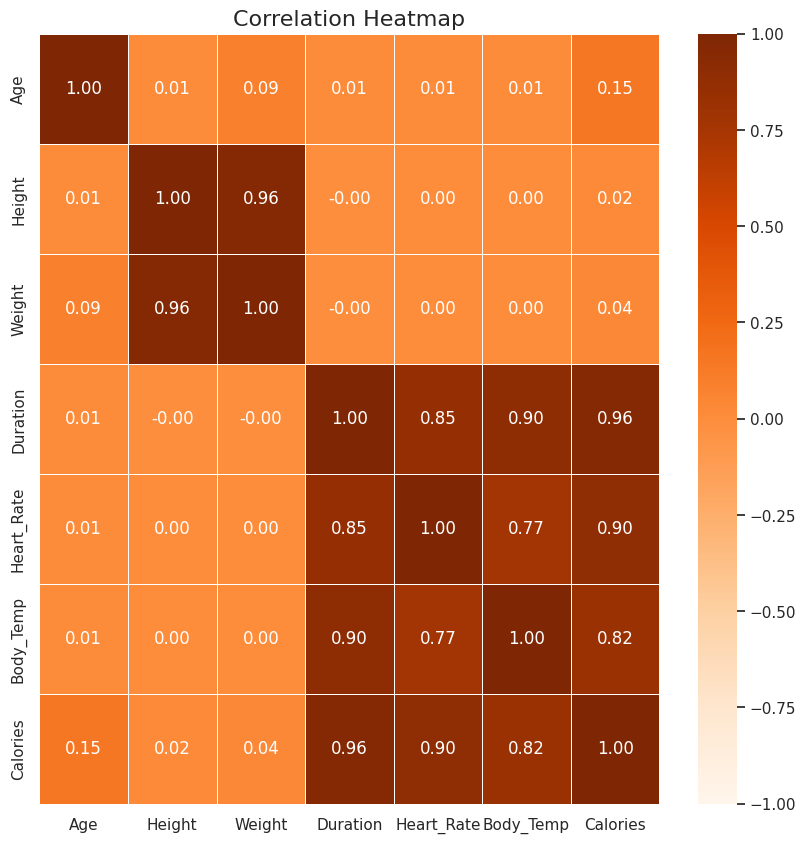

In [60]:
# Constructing a heatmap to understand the correlation between numerical features
plt.figure(figsize=(10, 10))

# Plot the correlation heatmap with annotations and a 'Blues' color map
sns.heatmap(numerical_data.corr(), cmap='Oranges', annot=True, fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Display the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Concatenate Categorical and Numerical


In [61]:
# Concatenating the categorical and numerical data along the columns (axis=1)
combined_data = pd.concat([categorical_data, numerical_data], axis=1)

# Display the first few rows of the combined data
combined_data.head()


,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,True,68,190.0,94.0,29.0,105.0,40.8,231.0
1,False,20,166.0,60.0,14.0,94.0,40.3,66.0
2,True,69,179.0,79.0,5.0,88.0,38.7,26.0
3,False,34,179.0,71.0,13.0,100.0,40.5,71.0
4,False,27,154.0,58.0,10.0,81.0,39.8,35.0


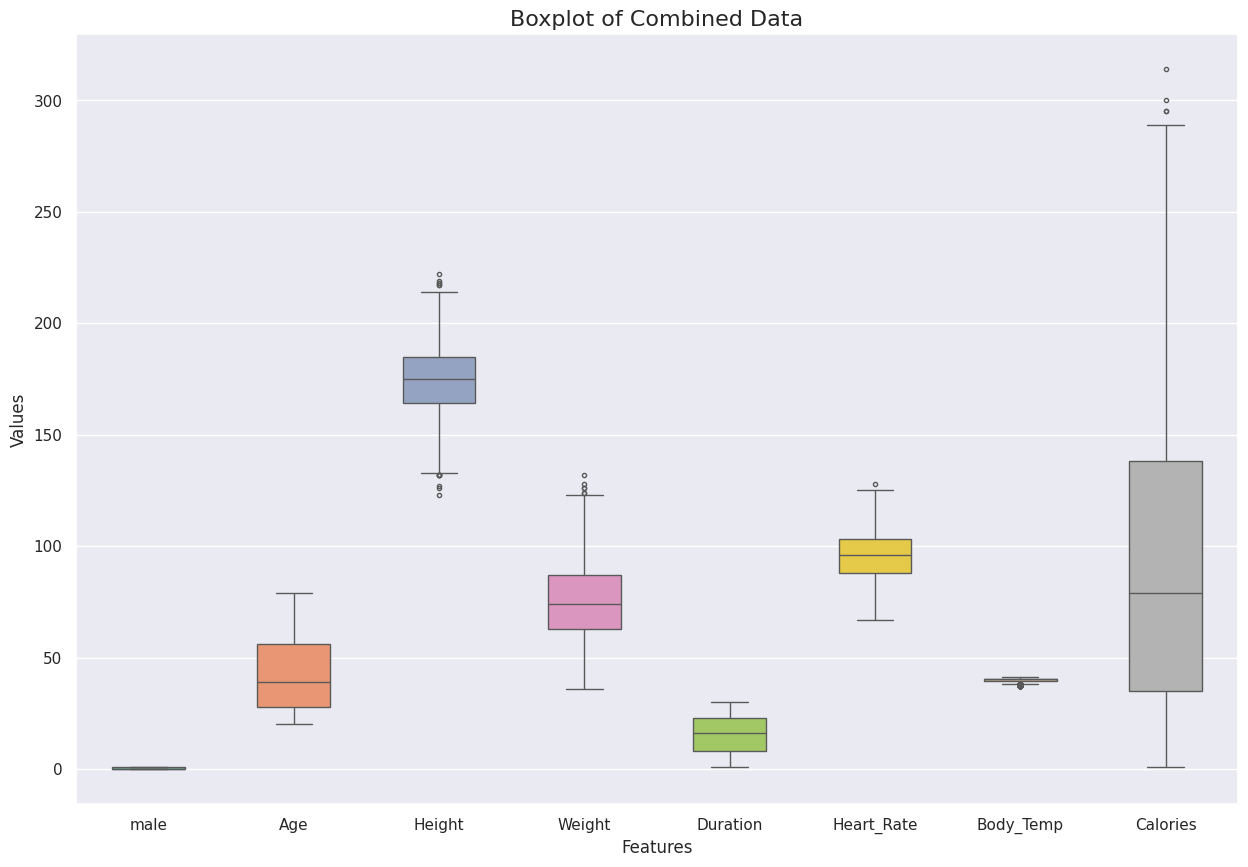

In [62]:
# Create a boxplot to visualize the distribution of data across both categorical and numerical columns
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the boxplot with customizations for width and outlier size
sns.boxplot(data=combined_data, width=0.5, fliersize=3, ax=ax, palette="Set2")

# Adding a title and labels for better readability
ax.set_title('Boxplot of Combined Data', fontsize=16)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Values', fontsize=12)

# Display the plot
plt.show()


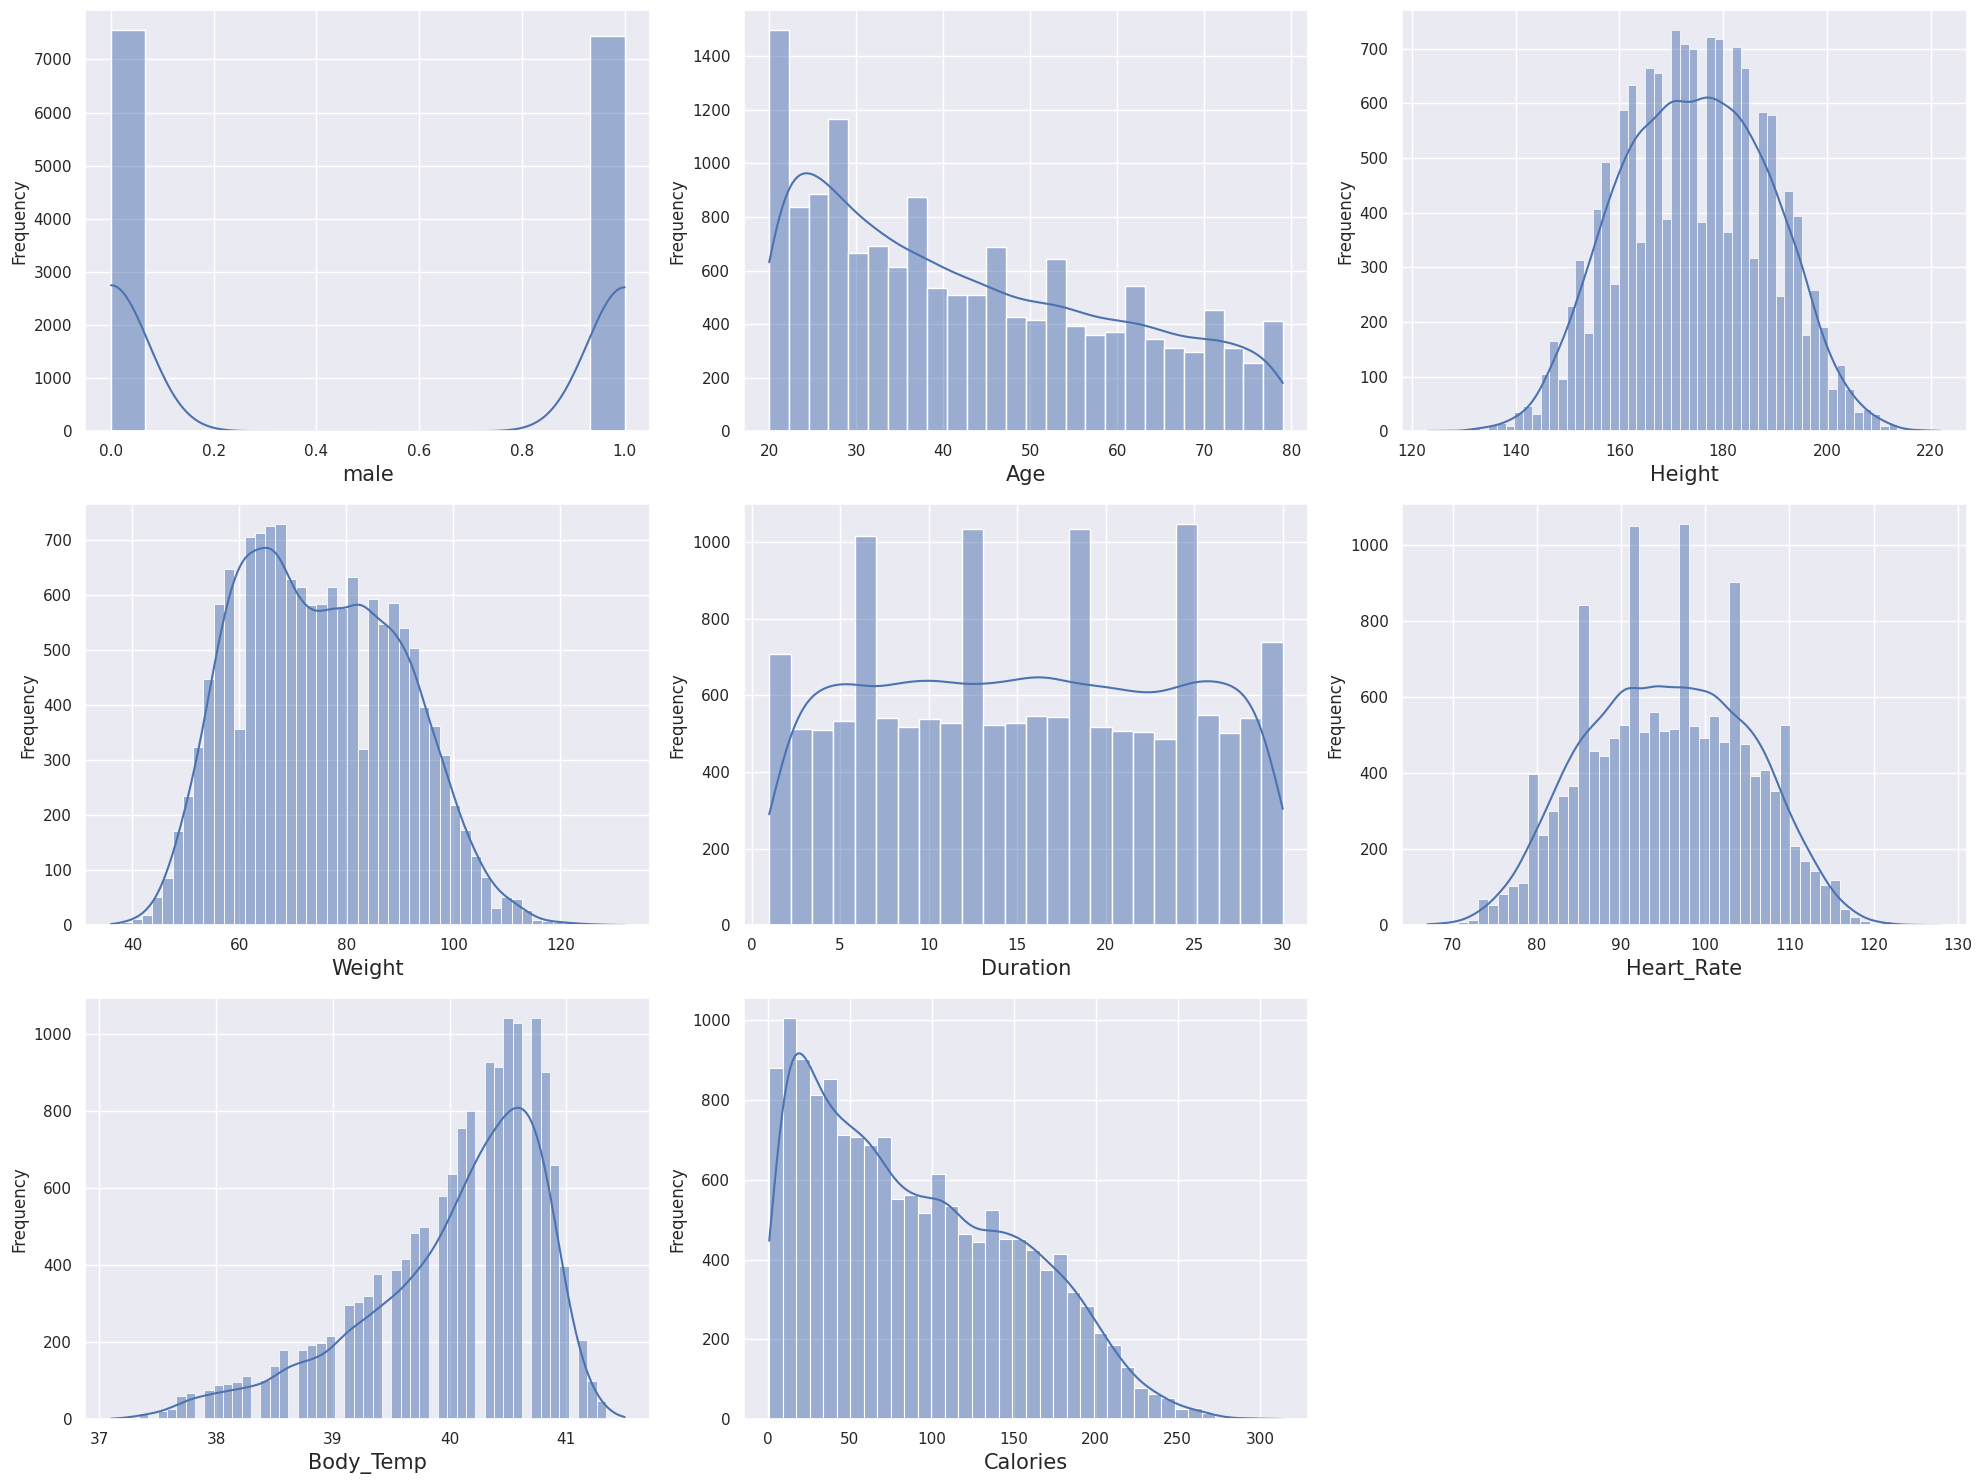

In [63]:
# Set up the plot figure size
plt.figure(figsize=(20, 15))

# Initialize the plot number
plot_number = 1

# Loop through each column in the combined data and plot the distribution
for column in combined_data:
    if plot_number <= 9:  # Adjusted the condition to limit to 9 subplots (3x3 grid)
        ax = plt.subplot(3, 3, plot_number)
        sns.histplot(combined_data[column], kde=True)  # Updated to use 'histplot' for better compatibility
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Frequency', fontsize=12)
    plot_number += 1

# Display the plots
plt.tight_layout()  # Added for better spacing between subplots
plt.show()


In [64]:
# Display the column names of the combined data
combined_data.columns

Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [65]:
# Splitting the data into features (X) and target (y)
X = combined_data.drop(columns=["Calories"], axis=1)  # Drop the target column 'Calories' from features
y = combined_data["Calories"]  # The target column is 'Calories'

# Display the first few rows of the feature set (X)
X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,68,190.0,94.0,29.0,105.0,40.8
1,False,20,166.0,60.0,14.0,94.0,40.3
2,True,69,179.0,79.0,5.0,88.0,38.7
3,False,34,179.0,71.0,13.0,100.0,40.5
4,False,27,154.0,58.0,10.0,81.0,39.8


In [66]:
y.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [67]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((12000, 7), (3000, 7), (12000,), (3000,))

In [68]:
from sklearn import metrics
import seaborn as sns
import numpy as np

def predict(ml_model):
    # Fit the model to the training data
    model = ml_model.fit(X_train, y_train)

    # Print the R² score of the model on the training data
    print(f'Score: {model.score(X_train, y_train):.4f}')

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print the predictions
    print(f'Predictions: \n{y_pred[:10]}...')  # Show first 10 predictions for brevity

    # Calculate and print the evaluation metrics
    r2 = metrics.r2_score(y_test, y_pred)
    print(f'R² Score: {r2:.4f}')
    print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.4f}')

    # Plot the distribution of the residuals
    sns.histplot(y_test - y_pred, kde=True)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.show()


# Linear Regression

Score: 0.9676
Predictions: 
[198.81182363  80.43555305 194.40940033  17.39285622  78.9692843
  15.28475163  -0.3413037  146.15851941 209.87196487  -1.10270603]...
R² Score: 0.9656
MAE: 8.4791
MSE: 138.1241
RMSE: 11.7526


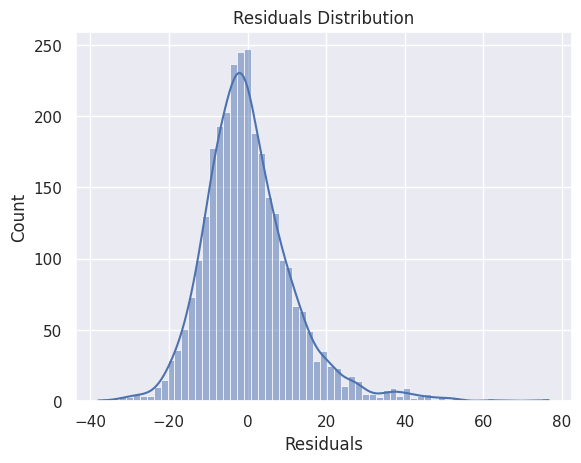

In [69]:
# Call the predict function with Linear Regression model
predict(LinearRegression())

Score: 1.0000
Predictions: 
[194.  75. 206.  17.  72.  24.   5. 148. 256.   7.]...
R² Score: 0.9923
MAE: 3.5277
MSE: 30.9590
RMSE: 5.5641


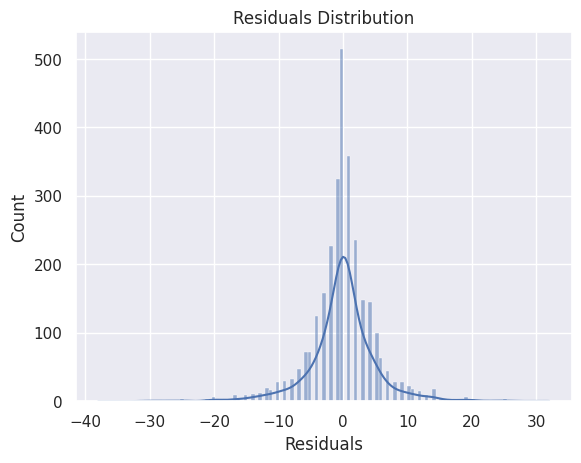

In [70]:
# Call the predict function with DecisionTreeRegressor
predict(DecisionTreeRegressor())

Score: 0.9995
Predictions: 
[197.06581   70.867226 196.99498   16.840124  72.875145  23.09963
   5.074159 147.85599  255.69847    6.907859]...
R² Score: 0.9987
MAE: 1.5522
MSE: 5.2744
RMSE: 2.2966


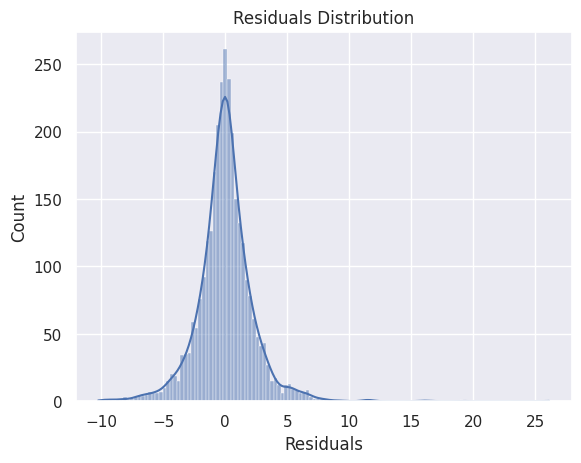

In [71]:
# Call the predict function with XGBRegressor
predict(XGBRegressor())

Score: 0.9997
Predictions: 
[196.55  66.06 194.89  16.89  73.12  23.55   5.31 146.64 256.96   6.78]...
R² Score: 0.9977
MAE: 1.8178
MSE: 9.3771
RMSE: 3.0622


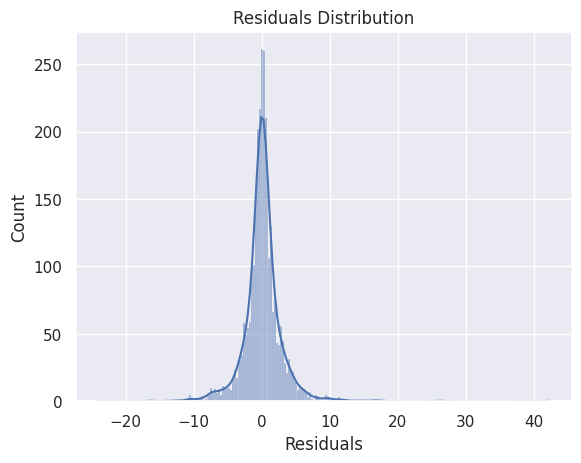

In [72]:
# Call the predict function with RandomForestRegressor
predict(RandomForestRegressor())

From this we can infer that XGB Regressor gives the minimum error rate with a score of 99.95%.

- Score: 0.9995
- R² Score: 0.9987
- MAE: 1.5522
- MSE: 5.2744
- RMSE: 2.2966